In [2]:
import PIL
from PIL import Image
import math
import numpy as np
from skimage.util import random_noise
import os
import pandas as pd
import matplotlib.pyplot as plt
from skimage import transform
from skimage.transform import SimilarityTransform, AffineTransform
import random 
import shutil
from tqdm import tqdm
import glob
import cv2

%matplotlib inline

## Copy image to folder

In [3]:
def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)

In [4]:
FFHQ_PATH = "D:/Dataset/FFHQ_work/"
SR_PATH = "D:/Dataset/FFHQ_work/"
TRAIN_PATH = "D:/Dataset/FFHQ_work/train/"
TEST_PATH  = "D:/Dataset/FFHQ_work/test/"
VAL_PATH  = "D:/Dataset/FFHQ_work/validation/"

# Read landmarks

In [22]:
import json
path_json_lm = os.path.join(FFHQ_PATH,'ffhq-dataset-v2.json')
with open(path_json_lm) as f:
    d = json.load(f)

In [23]:
new_dict={}
for id_key in d.keys():
    new_dict[id_key]={}
    new_dict[id_key]['image']={}
    new_dict[id_key]['image']['face_landmarks']=d[id_key]['image']['face_landmarks']

In [24]:
path_json_ext_lm = os.path.join(FFHQ_PATH,'ffhq-dataset-v2-imglandmark.json')
with open(path_json_ext_lm, 'w') as outfile:
    json.dump(new_dict, outfile)

In [25]:
import json
path_json_lm = os.path.join(FFHQ_PATH,'ffhq-dataset-v2-imglandmark.json')
with open(path_json_lm) as f:
    d = json.load(f)

In [98]:
def shape_to_np(shape, dtype="int"):
	# initialize the list of (x, y)-coordinates
	coords = np.zeros((68, 2), dtype=dtype)
	# loop over the 68 facial landmarks and convert them
	# to a 2-tuple of (x, y)-coordinates
	for i in range(0, 68):
		coords[i] = (shape.part(i).x, shape.part(i).y)
	# return the list of (x, y)-coordinates
	return coords

In [134]:

#shape_to_np(lm)

In [135]:
lm[0]

array([131, 453])

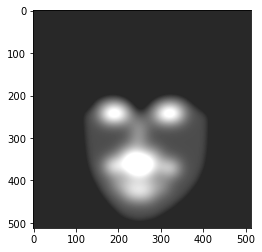

In [374]:
from scipy.ndimage import convolve,gaussian_filter
# Create landmarks
index=1
lm = d[str(index)]['image']['face_landmarks']
lm = np.asarray(lm).astype(int)
base_cnv = np.zeros((1024, 1024)).astype(np.uint8)

# Base Contour
#ctr = lm[:17].reshape((-1,1,2)).astype(np.int32)
lm_out = np.concatenate((lm[:17], np.flip(lm[22:27], axis=0), np.array(
    [lm[27]]), np.flip(lm[17:22], axis=0)), axis=0)
ctr = lm_out.reshape((-1, 1, 2)).astype(np.int32)
cv2.drawContours(base_cnv, [ctr], -1,
                    (255, 255, 255), thickness=cv2.FILLED)
base_cnv = base_cnv.astype(int)/4
base_cnv = cv2.resize(base_cnv, dsize=(512, 512),
                        interpolation=cv2.INTER_CUBIC)

face_mask = np.zeros((1024, 1024))
kernel = np.ones((20, 20))
for lpt in lm[28:]:
    face_mask[lpt[1], lpt[0]] = 255
face_mask = convolve(face_mask, kernel)
face_mask = gaussian_filter(face_mask, sigma=30)
face_mask = cv2.resize(face_mask, (512, 512))*255/np.max(face_mask)
face_mask = base_cnv+face_mask
face_mask = gaussian_filter(face_mask, sigma=10)*1.2
face_mask = np.clip(face_mask, 40, 255)/255
plt.imshow(face_mask,cmap='gray',vmin=0,vmax=1)

(-0.5, 511.5, 511.5, -0.5)

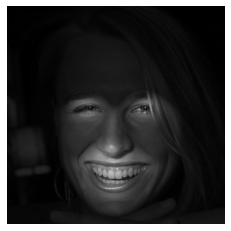

In [375]:
orig_img=np.array(PIL.ImageOps.grayscale(Image.open(os.path.join(FFHQ_PATH,'train_512','00001.jpg'))))
orig_img = np.multiply(face_mask,orig_img)
plt.imshow(orig_img,cmap='gray',vmin=0,vmax=255)
plt.axis('off')

In [371]:
np.max(orig_img)

25203.31025110516

In [ ]:
plt.imshow()

In [292]:
ab.max()

254.99999999999997

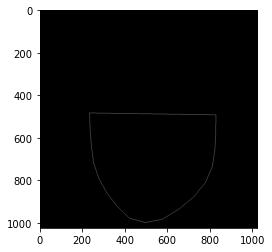

In [65]:
np.min(ab)
np.max(ab)

255.0

In [64]:
ab

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
ab[tuple(cd)]

array([1., 1.])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [22]:
d['0']['image']['face_landmarks'][0]

[131.62, 453.8]

In [4]:
src_dir = os.path.join(SR_PATH,os.listdir(SR_PATH)[0])

In [5]:
print(len(os.listdir(SR_PATH)))

70


In [ ]:
dest_dir = VAL_PATH
for i in range(50,60):
    folder_name = os.listdir(SR_PATH)[i]
    src_dir = os.path.join(SR_PATH,os.listdir(SR_PATH)[i])
    print("copying from {0}, num of files: {1}".format(folder_name,(len(os.listdir(src_dir)))))
    shutil.copytree(src_dir, dest_dir, dirs_exist_ok=True)

In [9]:
def copy_files_from_folder(src_path,dest_dir,min_id=None,max_id=None):
    folder_list = os.listdir(src_path)
    if ((min_id != None) and (max_id != None)):
        folder_list = folder_list[min_id:max_id]
    for folder_name in folder_list:
        src_dir = os.path.join(src_path,folder_name)
        print("copying from {0}, num of files: {1}".format(folder_name,(len(os.listdir(src_dir)))))
        shutil.copytree(src_dir, dest_dir, dirs_exist_ok=True)

copy_files_from_folder("D:/Dataset/FFHQ","D:/Dataset/FFHQ_work/test",65,70)

copying from 65000_jpg, num of files: 1000
copying from 66000_jpg, num of files: 1000
copying from 67000_jpg, num of files: 1001
copying from 68000_jpg, num of files: 1001
copying from 69000_jpg, num of files: 1001


In [10]:
#dest_dir = "D:/Dataset/FFHQ_work/ALL"
#src_path = FFHQ_PATH
#for i in range(len(os.listdir(src_path))):
#    src_dir = os.path.join(src_path,os.listdir(src_path)[i])
#    shutil.copytree(src_dir, dest_dir, dirs_exist_ok=True)

In [30]:
dest_dir = VAL_PATH
for i in range(50,60):
    folder_name = os.listdir(SR_PATH)[i]
    src_dir = os.path.join(SR_PATH,os.listdir(SR_PATH)[i])
    print("copying from {0}, num of files: {1}".format(folder_name,(len(os.listdir(src_dir)))))
    shutil.copytree(src_dir, dest_dir, dirs_exist_ok=True)

copying from 50000_jpg, num of files: 1000
copying from 51000_jpg, num of files: 1001
copying from 52000_jpg, num of files: 1001
copying from 53000_jpg, num of files: 1001
copying from 54000_jpg, num of files: 1001
copying from 55000_jpg, num of files: 1000
copying from 56000_jpg, num of files: 1000
copying from 57000_jpg, num of files: 1000
copying from 58000_jpg, num of files: 1000
copying from 59000_jpg, num of files: 1000


In [27]:
dest_dir = TEST_PATH
for i in range(60,70):
    src_dir = os.path.join(SR_PATH,os.listdir(SR_PATH)[i])
    shutil.copytree(src_dir, dest_dir, dirs_exist_ok=True)

Validate number of files

In [6]:
print(len(os.listdir(TRAIN_PATH)))
print(len(os.listdir(VAL_PATH)))
print(len(os.listdir(TEST_PATH)))

70001
10001
10001


# SRN Prototyping Only

## Bicubic downsampling function

In [10]:
def bicubic_downsample(im, factor=4):
    width, height = im.size
    new_width = int(math.floor(width / factor))
    new_height = int(math.floor(height / factor))
    im = im.resize((new_width, new_height), resample=PIL.Image.BICUBIC)
    # convert to [0.0,1.0]
    im = np.array(im)
    im = im/255
    im = random_noise(im,var=2e-3)
    im = random_noise(im,mode='s&p',amount=2e-3)
    im = Image.fromarray(np.multiply(im,255).astype('uint8'), 'RGB')
    return im

In [11]:
new_size = (512,512)
for img_path in tqdm(os.listdir(TRAIN_PATH)[0:10000]):
    img_path = os.path.join(TRAIN_PATH,img_path)
    img_folder_lr = os.path.dirname(TRAIN_PATH)+'_512'
    if not os.path.exists(img_folder_lr):
        os.makedirs(img_folder_lr)
    img_file_name = img_path.split('/')[-1]
    im=Image.open(img_path).resize(new_size,resample=PIL.Image.BICUBIC)
    im.save(os.path.join(img_folder_lr,img_file_name))

100%|██████████| 10000/10000 [05:35<00:00, 29.78it/s]


In [13]:
TEST_PATH

'D:/Dataset/FFHQ_work/test/'

In [23]:
img_folder_path = TEST_PATH
new_size = (512,512)

files_jpg = [l for l in glob.glob(os.path.join(img_folder_path, '*')) if l.lower().endswith(('jpg', 'png', 'jpeg'))]
files_jpg = sorted(files_jpg)
for img_path in tqdm(files_jpg):
    img_path = os.path.join(img_folder_path,img_path)
    img_folder_lr = os.path.dirname(img_folder_path)+'_512'
    if not os.path.exists(img_folder_lr):
        os.makedirs(img_folder_lr)
    img_file_name = os.path.split(img_path)[1]
    im=Image.open(img_path).resize(new_size,resample=PIL.Image.BICUBIC)
    im.save(os.path.join(img_folder_lr,img_file_name))

100%|██████████| 5000/5000 [02:46<00:00, 30.07it/s]


In [18]:
files_jpg[0]

'D:/Dataset/FFHQ_work/test\\65000.jpg'

'69999.jpg'

In [23]:
IMG_SOURCE_PATH = "D:/Dataset/FFHQ/"
IMG_FOLDER_PATH = VAL_PATH
new_size = (512,512)

files_jpg = [l for l in glob.glob(os.path.join(IMG_SOURCE_PATH, '*')) if l.lower().endswith(('jpg', 'png', 'jpeg'))]
files_jpg = sorted(files_jpg)
for img_path in tqdm(files_jpg[65000: 70000]):
    img_path = os.path.join(IMG_FOLDER_PATH,img_path)
    img_folder_lr = os.path.dirname(IMG_FOLDER_PATH)+'_512'
    if not os.path.exists(img_folder_lr):
        os.makedirs(img_folder_lr)
    img_file_name = img_path.split('/')[-1]
    im=Image.open(img_path).resize(new_size,resample=PIL.Image.BICUBIC)
    im.save(os.path.join(img_folder_lr,img_file_name))

0it [00:00, ?it/s]


In [9]:
IMG_FOLDER_PATH = VAL_PATH
new_size = (512,512)
for img_path in tqdm(os.listdir(IMG_FOLDER_PATH)[65000, 70000]):
    img_path = os.path.join(IMG_FOLDER_PATH,img_path)
    img_folder_lr = os.path.dirname(IMG_FOLDER_PATH)+'_512'
    if not os.path.exists(img_folder_lr):
        os.makedirs(img_folder_lr)
    img_file_name = img_path.split('/')[-1]
    im=Image.open(img_path).resize(new_size,resample=PIL.Image.BICUBIC)
    im.save(os.path.join(img_folder_lr,img_file_name))

100%|██████████| 125/125 [00:04<00:00, 27.13it/s]


In [49]:
newsize = (127,127)
to_lr_path = VAL_PATH
for img_path in tqdm(os.listdir(to_lr_path)):
    img_path = os.path.join(to_lr_path,img_path)
    img_folder_lr = os.path.dirname(to_lr_path)+'_lr'
    img_file_name = img_path.split('/')[-1]
    im=Image.open(img_path).resize(newsize,resample=PIL.Image.BICUBIC)
    im.save(os.path.join(img_folder_lr,img_file_name))

100%|█████████▉| 10000/10001 [04:24<00:00, 37.84it/s]


UnidentifiedImageError: cannot identify image file 'D:/Dataset/FFHQ/validation/Thumbs.db'

In [43]:
img_path.split('/')[-1]

'00000.jpg'

In [48]:
VAL_PATH

'D:/Dataset/FFHQ/validation/'

In [39]:
os.path.join(img_file_name.split('/')[-1])

'00000.jpg'

In [34]:
img_name.split('/')[-1]

'00000'

In [41]:
os.listdir(TRAIN_PATH)

['00000.jpg',
 '00001.jpg',
 '00002.jpg',
 '00003.jpg',
 '00004.jpg',
 '00005.jpg',
 '00006.jpg',
 '00007.jpg',
 '00008.jpg',
 '00009.jpg',
 '00010.jpg',
 '00011.jpg',
 '00012.jpg',
 '00013.jpg',
 '00014.jpg',
 '00015.jpg',
 '00016.jpg',
 '00017.jpg',
 '00018.jpg',
 '00019.jpg',
 '00020.jpg',
 '00021.jpg',
 '00022.jpg',
 '00023.jpg',
 '00024.jpg',
 '00025.jpg',
 '00026.jpg',
 '00027.jpg',
 '00028.jpg',
 '00029.jpg',
 '00030.jpg',
 '00031.jpg',
 '00032.jpg',
 '00033.jpg',
 '00034.jpg',
 '00035.jpg',
 '00036.jpg',
 '00037.jpg',
 '00038.jpg',
 '00039.jpg',
 '00040.jpg',
 '00041.jpg',
 '00042.jpg',
 '00043.jpg',
 '00044.jpg',
 '00045.jpg',
 '00046.jpg',
 '00047.jpg',
 '00048.jpg',
 '00049.jpg',
 '00050.jpg',
 '00051.jpg',
 '00052.jpg',
 '00053.jpg',
 '00054.jpg',
 '00055.jpg',
 '00056.jpg',
 '00057.jpg',
 '00058.jpg',
 '00059.jpg',
 '00060.jpg',
 '00061.jpg',
 '00062.jpg',
 '00063.jpg',
 '00064.jpg',
 '00065.jpg',
 '00066.jpg',
 '00067.jpg',
 '00068.jpg',
 '00069.jpg',
 '00070.jpg',
 '0007

In [ ]:
im_rsz.save('maradona_ds.jpeg')

In [ ]:
np.array(im)

array([[[122, 132, 144],
        [122, 132, 142],
        [123, 131, 142],
        ...,
        [ 86,  84,  87],
        [ 85,  83,  84],
        [ 85,  83,  84]],

       [[123, 133, 143],
        [123, 133, 143],
        [124, 133, 142],
        ...,
        [ 87,  85,  88],
        [ 86,  84,  85],
        [ 86,  84,  85]],

       [[124, 132, 143],
        [124, 133, 142],
        [124, 133, 142],
        ...,
        [ 89,  87,  90],
        [ 88,  86,  89],
        [ 87,  85,  88]],

       ...,

       [[ 84, 103,  99],
        [ 77,  96,  94],
        [ 54,  74,  73],
        ...,
        [ 45,  72,  81],
        [ 48,  77,  85],
        [ 71, 100, 106]],

       [[ 74,  93,  89],
        [ 78,  97,  95],
        [ 58,  78,  77],
        ...,
        [ 54,  81,  90],
        [ 44,  73,  81],
        [ 53,  82,  88]],

       [[ 62,  81,  77],
        [ 76,  95,  93],
        [ 60,  80,  79],
        ...,
        [ 50,  77,  86],
        [ 40,  69,  77],
        [ 50,  79,  85]]

# Image Transformation Experiment

In [4]:
id_file_path = "D:Dataset/CelebA/list_landmarks_align_celeba.csv"
img_folder_path = "D:Dataset/CelebA/img_align_celeba/img_align_celeba/"

In [5]:
tbl_id =  pd.read_csv(id_file_path)
tbl_id.head(5)

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,66,114,112,112,86,119,71,147,104,150


In [6]:
tbl_dict = tbl_id.to_dict()

In [7]:
attr_name = []
for i in list(tbl_dict.keys())[1:]:
    attr_name.append(i.split('_')[0])

attr_name = list(set(attr_name))

In [8]:
new_dict={}
for i in attr_name:
    new_dict[i]=list(zip(tbl_dict[i+'_x'].values(),tbl_dict[i+'_y'].values()))

In [9]:
list_values=[]
for i in attr_name:
    list_values.append(list(zip(tbl_dict[i+'_x'].values(),tbl_dict[i+'_y'].values())))

In [10]:
ab=list(zip(*list_values))
ab[0]

((108, 154), (106, 113), (69, 109), (73, 152), (77, 142))

In [11]:
new_dict['image_id']=tbl_id['image_id']
img_id_list = tbl_id['image_id']

In [12]:
im = Image.open(os.path.join(img_folder_path,img_id_list[20]))

(178, 218)


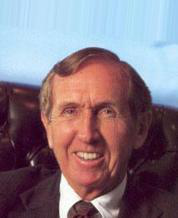

In [13]:
print(im.size)
im

In [16]:
def gaussian_k(x0,y0,sigma, height, width):
        """ Make a square gaussian kernel centered at (x0, y0) with sigma as SD.
        """
        x = np.arange(0, width, 1, float) ## (width,)
        y = np.arange(0, height, 1, float)[:, np.newaxis] ## (height,1)
        return np.exp(-((x-x0)**2 + (y-y0)**2) / (2*sigma**2))

def generate_hm(height, width ,landmarks,s=3):
        """ Generate a full Heap Map for every landmarks in an array
        Args:
            height    : The height of Heat Map (the height of target output)
            width     : The width  of Heat Map (the width of target output)
            joints    : [(x1,y1),(x2,y2)...] containing landmarks
            maxlenght : Lenght of the Bounding Box
        """
        Nlandmarks = len(landmarks)
        hm = np.zeros((height, width, Nlandmarks), dtype = np.float32)
        for i in range(Nlandmarks):
            if not np.array_equal(landmarks[i], [-1,-1]):
                hm[:,:,i] = gaussian_k(landmarks[i][0],
                                        landmarks[i][1],
                                        s,height, width)
            else:
                hm[:,:,i] = np.zeros((height,width))
        return hm

(218, 178, 5)


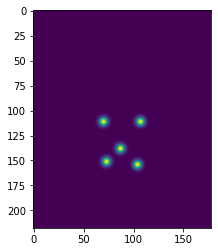

In [17]:
hm_map = generate_hm(im.size[1],im.size[0],ab[20])
print(hm_map.shape)
hm_map = np.amax(hm_map,2)
plt.imshow(hm_map)

plot landmark in face image

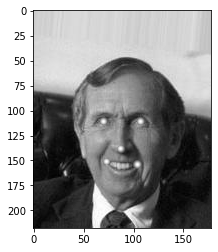

In [18]:
img_gray = np.asarray(im.convert('L'))/255
plt.imshow(np.maximum(img_gray,hm_map),cmap='gray')

### Rotate Image

In [100]:
max_scale=0.01
max_rotation=0.01
max_shift=0.002
max_shear=0
mode="edge"

(1.0083699306291825, 1.0021102791032122)
-0.13685233930303461
(0.0002519728733187624, -0.0019200828653087613)
0.0


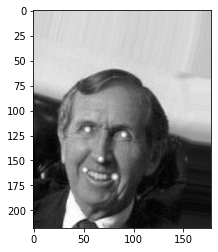

In [108]:
def warp_image(img_gray,hm_map,max_scale,max_rotation,max_shift,max_shear,mode):
    scale = (np.random.uniform(1-max_scale, 1 + max_scale),
                np.random.uniform(1-max_scale, 1 + max_scale))
    rotation_tmp = np.random.uniform(-1*max_rotation, max_rotation)
    translation = (np.random.uniform(-1*max_shift, max_shift),
                    np.random.uniform(-1*max_shift, max_shift))
    shear = np.random.uniform(-1*max_shear, max_shear)

    print(scale)
    print(np.rad2deg(rotation_tmp))
    print(translation)
    print(shear)
    tform = AffineTransform(
                scale=scale,#,
                ## Convert angles from degrees to radians.
                rotation=np.rad2deg(rotation_tmp),
                translation=translation,
                shear=np.deg2rad(shear)
            )
    img_gray_tf = transform.warp(img_gray, tform,mode=mode)
    #plt.imshow(img_gray_tf,cmap='gray')

    hm_map_warp = transform.warp(hm_map, tform,mode=mode)
    #plt.imshow(hm_map_warp,cmap='gray')
    return img_gray_tf,hm_map_warp

img_gray_tf,hm_map_warp = warp_image(img_gray,hm_map,max_scale,max_rotation,max_shift,max_shear,mode='edge')
plt.imshow(np.maximum(img_gray_tf,hm_map_warp),cmap='gray')

In [109]:
tform = transform.estimate_transform('affinity', [], []])

<AffineTransform(matrix=
    [[ 0.98369325,  0.22353326,  0.01508024],
     [-0.22394043,  0.98190468,  0.00980817],
     [ 0.        ,  0.        ,  1.        ]]) at 0x27b72349be0>

(0.9900894612528746, 0.9775584270256628)
-0.15686437078513515
(1.6667857875690455, 0.28324770489482143)
0.0


In [ ]:
landmark_order = {"orig" : [0,1,2,3,4,5,6,7,8,9,11,12],
                  "new"  : [1,0,4,5,2,3,8,9,6,7,12,11]}

In [ ]:
def transform_img(data,
                  loc_w_batch=2,
                  max_rotation=0.01,
                  max_shift=2,
                  max_shear=0,
                  max_scale=0.01,mode="edge"):
    '''
    data : list of numpy arrays containing a single image
    e.g., data = [X, y, w] or data = [X, y]
    X.shape = (height, width, NfeatX)
    y.shape = (height, width, Nfeaty)
    w.shape = (height, width, Nfeatw)
    NfeatX, Nfeaty and Nfeatw can be different
    
    affine transformation for a single image
    
    loc_w_batch : the location of the weights in the fourth dimention
    [,,,loc_w_batch]
    '''
    scale = (np.random.uniform(1-max_scale, 1 + max_scale),
             np.random.uniform(1-max_scale, 1 + max_scale))
    rotation_tmp = np.random.uniform(-1*max_rotation, max_rotation)
    translation = (np.random.uniform(-1*max_shift, max_shift),
                   np.random.uniform(-1*max_shift, max_shift))
    shear = np.random.uniform(-1*max_shear, max_shear)
    tform = AffineTransform(
            scale=scale,#,
            ## Convert angles from degrees to radians.
            rotation=np.deg2rad(rotation_tmp),
            translation=translation,
            shear=np.deg2rad(shear)
        )
    
    for idata, d in enumerate(data):
        if idata != loc_w_batch:
            ## We do NOT need to do affine transformation for weights
            ## as weights are fixed for each (image,landmark) combination
            data[idata] = transform.warp(d, tform,mode=mode)
    return data
def transform_imgs(data, lm, 
                   loc_y_batch = 1, 
                   loc_w_batch = 2):
    '''
    data : list of numpy arrays containing a single image
    e.g., data = [X, y, w] or data = [X, y]
    X.shape = (height, width, NfeatX)
    y.shape = (height, width, Nfeaty)
    w.shape = (height, width, Nfeatw)
    NfeatX, Nfeaty and Nfeatw can be different
    
    affine transformation for a single image
    '''
    Nrow  = data[0].shape[0]
    Ndata = len(data) 
    data_transform = [[] for i in range(Ndata)]
    for irow in range(Nrow):
        data_row = []
        for idata in range(Ndata):
            data_row.append(data[idata][irow])
        ## affine transformation
        data_row_transform = transform_img(data_row,
                                          loc_w_batch)
        ## horizontal flip
        data_row_transform = horizontal_flip(data_row_transform,
                                             lm,
                                             loc_y_batch,
                                             loc_w_batch)
        
        for idata in range(Ndata):
            data_transform[idata].append(data_row_transform[idata])
    
    for idata in range(Ndata):
        data_transform[idata] = np.array(data_transform[idata])
    
    
    return(data_transform)

def horizontal_flip(data,lm,loc_y_batch=1,loc_w_batch=2):  
    '''
    flip the image with 50% chance
    
    lm is a dictionary containing "orig" and "new" key
    This must indicate the potitions of heatmaps that need to be flipped  
    landmark_order = {"orig" : [0,1,2,3,4,5,6,7,8,9,11,12],
                      "new"  : [1,0,4,5,2,3,8,9,6,7,12,11]}
                      
    data = [X, y, w]
    w is optional and if it is in the code, the position needs to be specified
    with loc_w_batch
    
    X.shape (height,width,n_channel)
    y.shape (height,width,n_landmarks)
    w.shape (height,width,n_landmarks)
    '''
    lo, ln = np.array(lm["orig"]), np.array(lm["new"])

    assert len(lo) == len(ln)
    if np.random.choice([0,1]) == 1:
        return(data)
    
    for i, d in enumerate(data):
        d = d[:, ::-1,:] 
        data[i] = d


    data[loc_y_batch] = swap_index_for_horizontal_flip(
        data[loc_y_batch], lo, ln)

    # when horizontal flip happens to image, we need to heatmap (y) and weights y and w
    # do this if loc_w_batch is within data length
    if loc_w_batch < len(data):
        data[loc_w_batch] = swap_index_for_horizontal_flip(
            data[loc_w_batch], lo, ln)
    return(data)

def swap_index_for_horizontal_flip(y_batch, lo, ln):
    '''
    lm = {"orig" : [0,1,2,3,4,5,6,7,8,9,11,12],
          "new"  : [1,0,4,5,2,3,8,9,6,7,12,11]}
    lo, ln = np.array(lm["orig"]), np.array(lm["new"])                  
    '''
    y_orig = y_batch[:,:, lo]
    y_batch[:,:, lo] = y_batch[:,:, ln] 
    y_batch[:,:, ln] = y_orig
    return(y_batch)

In [ ]:
FTRAIN = "data/training.csv"
FTEST  = "data/test.csv"
FIdLookup = 'data/IdLookupTable.csv'

In [110]:
def gaussian_k(x0,y0,sigma, height, width):
        """ Make a square gaussian kernel centered at (x0, y0) with sigma as SD.
        """
        x = np.arange(0, width, 1, float) ## (width,)
        y = np.arange(0, height, 1, float)[:, np.newaxis] ## (height,1)
        return np.exp(-((x-x0)**2 + (y-y0)**2) / (2*sigma**2))

def generate_hm(height, width ,landmarks,s=3):
        """ Generate a full Heap Map for every landmarks in an array
        Args:
            height    : The height of Heat Map (the height of target output)
            width     : The width  of Heat Map (the width of target output)
            joints    : [(x1,y1),(x2,y2)...] containing landmarks
            maxlenght : Lenght of the Bounding Box
        """
        Nlandmarks = len(landmarks)
        hm = np.zeros((height, width, Nlandmarks), dtype = np.float32)
        for i in range(Nlandmarks):
            if not np.array_equal(landmarks[i], [-1,-1]):
                print(landmarks[i])
                hm[:,:,i] = gaussian_k(landmarks[i][0],
                                        landmarks[i][1],
                                        s,height, width)
            else:
                hm[:,:,i] = np.zeros((height,width))
        return hm
    
def get_y_as_heatmap(df,height,width, sigma):
    
    columns_lmxy = df.columns[1:] ## the first column contains Image
    columns_lm = [] 
    for c in columns_lmxy:
        c = c[:-2]
        #if c not in columns_lm:
        #    columns_lm.extend([c])
    
    y_train = []
    for i in range(df.shape[0]):
        landmarks = []
        for colnm in columns_lm:
            x = df[colnm + "_x"].iloc[i]
            y = df[colnm + "_y"].iloc[i]
            if np.isnan(x) or np.isnan(y):
                x, y = -1, -1
            landmarks.append([x,y])
            
        y_train.append(generate_hm(height, width, landmarks, sigma))
    y_train = np.array(y_train)
    
    
    return(y_train,df[columns_lmxy],columns_lmxy)

In [2]:
def load(test=False, width=96,height=96,sigma=5):
    """
    load test/train data
    cols : a list containing landmark label names.
           If this is specified, only the subset of the landmark labels are 
           extracted. for example, cols could be:
           
          [left_eye_center_x, left_eye_center_y]
            
    return: 
    X:  2-d numpy array (Nsample, Ncol*Nrow)
    y:  2-d numpy array (Nsample, Nlandmarks*2) 
        In total there are 15 landmarks. 
        As x and y coordinates are recorded, u.shape = (Nsample,30)
    y0: panda dataframe containins the landmarks
       
    """
    from sklearn.utils import shuffle
    
    fname = FTEST if test else FTRAIN
    df = pd.read_csv(os.path.expanduser(fname)) 

    
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))


    myprint = df.count()
    myprint = myprint.reset_index()
    print(myprint)  
    ## row with at least one NA columns are removed!
    ## df = df.dropna()  
    df = df.fillna(-1)

    X = np.vstack(df['Image'].values) / 255.  # changes valeus between 0 and 1
    X = X.astype(np.float32)

    if not test:  # labels only exists for the training data
        y, y0, nm_landmark = get_y_as_heatmap(df,height,width, sigma)
        X, y, y0 = shuffle(X, y, y0, random_state=42)  # shuffle data   
        y = y.astype(np.float32)
    else:
        y, y0, nm_landmark = None, None, None
    
    return X, y, y0, nm_landmark

def load2d(test=False,width=96,height=96,sigma=5):

    re   = load(test,width,height,sigma)
    X    = re[0].reshape(-1,width,height,1)
    y, y0, nm_landmarks = re[1:]
    
    return X, y, y0, nm_landmarks

In [ ]:
sigma = 5

X_train, y_train, y_train0, nm_landmarks = load2d(test=False,sigma=sigma)
X_test,  y_test, _, _ = load2d(test=True,sigma=sigma)
print X_train.shape,y_train.shape, y_train0.shape
print X_test.shape,y_test

# CELEB A PREPROCESSING

In [59]:
path_celeb_img = "D:/Dataset/CelebA/img_align_celeba/img_align_celeba"
df_eval=pd.read_csv("D:/Dataset/CelebA/list_eval_partition.csv")

In [54]:
list_img=df[df['partition']==0]['image_id'].values.tolist()
for img_path in list_img[0:10000]:
    path_dst = "D:/Dataset/FFHQ_work/celeba_train/"
    shutil.copy2(os.path.join(path_celeb_img,img_path),path_dst)

In [55]:
list_img=df[df['partition']==1]['image_id'].values.tolist()
for img_path in list_img[0:5000]:
    path_dst = "D:/Dataset/FFHQ_work/celeba_val/"
    if not os.path.exists(path_dst):
        os.makedirs(path_dst)
    shutil.copy2(os.path.join(path_celeb_img,img_path),path_dst)

In [56]:
list_img=df[df['partition']==2]['image_id'].values.tolist()
for img_path in list_img[0:5000]:
    path_dst = "D:/Dataset/FFHQ_work/celeba_test/"
    if not os.path.exists(path_dst):
        os.makedirs(path_dst)
    shutil.copy2(os.path.join(path_celeb_img,img_path),path_dst)

In [51]:
len(df[df['partition']==2]['image_id'].values.tolist())

19962

## Celeb A-HQ

In [91]:
CELEBA_HQ_PATH = "D:/Dataset/CelebAMask-HQ"
map_file = os.path.join(CELEBA_HQ_PATH,"CelebA-HQ-to-CelebA-mapping.txt")
df_hq=pd.read_csv(map_file,sep='t',engine='python')

In [103]:
with open(map_file) as file:
    lines = file.readlines()
    lines = [";".join(line.rstrip().split()).split(';') for line in lines][1:]

df_hq = pd.DataFrame(lines, columns =['idx','orig_idx','orig_file'], dtype = float)

C:\Users\madin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


In [106]:
df_hq.loc[10]

idx                10.0
orig_idx       157745.0
orig_file    157746.jpg
Name: 10, dtype: object

In [107]:
print(df_hq.columns)
df_hq.head(5)

Index(['idx', 'orig_idx', 'orig_file'], dtype='object')


,idx,orig_idx,orig_file
0,0.0,119613.0,119614.jpg
1,1.0,99094.0,099095.jpg
2,2.0,200121.0,200122.jpg
3,3.0,81059.0,081060.jpg
4,4.0,202040.0,202041.jpg


In [109]:
df_comp=df_hq.merge(df_eval,left_on='orig_file',right_on='image_id',how='left')

In [114]:
df_comp.head(5)

,idx,orig_idx,orig_file,image_id,partition
0,0.0,119613.0,119614.jpg,119614.jpg,0
1,1.0,99094.0,099095.jpg,099095.jpg,0
2,2.0,200121.0,200122.jpg,200122.jpg,2
3,3.0,81059.0,081060.jpg,081060.jpg,0
4,4.0,202040.0,202041.jpg,202041.jpg,2


In [132]:
idx_list = df_comp['idx'].astype(int).astype(str).tolist()
file_name_list=[s + '.jpg' for s in idx_list]
df_comp['file_name']=file_name_list
df_comp.head(5)

,idx,orig_idx,orig_file,image_id,partition,file_name
0,0.0,119613.0,119614.jpg,119614.jpg,0,0.jpg
1,1.0,99094.0,099095.jpg,099095.jpg,0,1.jpg
2,2.0,200121.0,200122.jpg,200122.jpg,2,2.jpg
3,3.0,81059.0,081060.jpg,081060.jpg,0,3.jpg
4,4.0,202040.0,202041.jpg,202041.jpg,2,4.jpg


In [134]:
df_now = df_comp[df_comp['partition']==0]
list_file_name=df_now['file_name'].values.tolist()
list_img_path=df_now['orig_file'].values.tolist()
list_img_name=df_now['file_name'].values.tolist()
PATH_CELEB_HQ = "D:\Dataset\CelebAMask-HQ\CelebA-HQ-img"

# Copy CelebA HQ 512x512 to HR folder
for idx,file_name in enumerate(list_file_name[:10000]):
    path_dst ="D:/Dataset/FFHQ_work/celeba_hr_train/"
    if not os.path.exists(path_dst):
        os.makedirs(path_dst)
    
    src_file = os.path.join(PATH_CELEB_HQ,file_name)
    src_img = Image.open(src_file).resize((512,512),PIL.Image.BICUBIC)
    path_dst = os.path.join(path_dst,file_name)
    src_img.save(path_dst)

In [ ]:

# Copy original CelebA to LR folder
for idx,file_name in enumerate(list_file_name[:10000]):
    path_dst ="D:/Dataset/FFHQ_work/celeba_hq_train/"
    if not os.path.exists(path_dst):
        os.makedirs(path_dst)

    img_path_hr = os.path.join(path_celeb_img,list_img_path[idx])
    path_dst = os.path.join(path_dst,file_name)
    shutil.copy2(img_path,path_dst)


In [ ]:
df_now = df_comp[df_comp['partition']==0]
list_file_name=df_now['file_name'].values.tolist()
list_img_path=df_now['orig_file'].values.tolist()
list_img_name=df_now['file_name'].values.tolist()

for idx,file_name in enumerate(list_file_name[:10000]):
    img_path = os.path.join(path_celeb_img,list_img_path[idx])
    path_dst = os.path.join("D:/Dataset/FFHQ_work/celeba_hq_train/",file_name)
    shutil.copy2(img_path,path_dst)

In [ ]:
df_now = df_comp[df_comp['partition']==0]
list_file_name=df_now['file_name'].values.tolist()
list_img_path=df_now['orig_file'].values.tolist()
list_img_name=df_now['file_name'].values.tolist()

for idx,file_name in enumerate(list_file_name[:10000]):
    img_path = os.path.join(path_celeb_img,list_img_path[idx])
    path_dst = os.path.join("D:/Dataset/FFHQ_work/celeba_hq_train/",file_name)
    shutil.copy2(img_path,path_dst)

In [111]:
df_comp[df_comp['partition']==0].shape

(24183, 5)

In [112]:
df_comp[df_comp['partition']==1].shape

(2993, 5)

In [113]:
df_comp[df_comp['partition']==2].shape

(2824, 5)